In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pathlib
base_dir = pathlib.Path("/content/drive/MyDrive/dataset") #path dataset

In [4]:
IMAGE_SIZE = 180
BATCH_SIZE = 32

In [5]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2
)

In [6]:
train_dataset = datagen.flow_from_directory(
    base_dir/'train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,

)
validation_dataset = datagen.flow_from_directory(
    base_dir/ 'validation',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

test_dataset = datagen.flow_from_directory(
    base_dir/ 'test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 800 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'benign': 0, 'malignent': 1}

In [8]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3) #180,180, RGB
base_model = tf.keras.applications.VGG16(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)
base_model.trainable=False

58889256/58889256 [==============================] - 2s 0us/step


In [9]:
# data_augmentation = keras.Sequential(
# [
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.2),
# ])

In [10]:
model = tf.keras.Sequential([
  base_model,
  # data_augmentation,
  tf.keras.layers.Conv2D(32,3, activation = 'relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='softmax')
])


In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
     loss='binary_crossentropy',
    metrics=['accuracy']
)

In [12]:
# model.summary()

In [13]:
# tf.keras.utils.plot_model(model, to_file = 'model.jpg', show_shapes = True)

In [14]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath= base_dir / "VGG16.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs= 50 ,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/50
25/25 [==============================] - 433s 17s/step - loss: 0.6838 - accuracy: 0.5387 - val_loss: 0.6618 - val_accuracy: 0.7575
Epoch 2/50
25/25 [==============================] - 5s 196ms/step - loss: 0.6380 - accuracy: 0.7237 - val_loss: 0.6250 - val_accuracy: 0.7775
Epoch 3/50
25/25 [==============================] - 5s 192ms/step - loss: 0.5977 - accuracy: 0.7600 - val_loss: 0.5979 - val_accuracy: 0.7650
Epoch 4/50
25/25 [==============================] - 5s 203ms/step - loss: 0.5659 - accuracy: 0.7837 - val_loss: 0.5723 - val_accuracy: 0.7850
Epoch 5/50
25/25 [==============================] - 5s 192ms/step - loss: 0.5348 - accuracy: 0.7987 - val_loss: 0.5513 - val_accuracy: 0.7750
Epoch 6/50
25/25 [==============================] - 5s 198ms/step - loss: 0.5100 - accuracy: 0.8050 - val_loss: 0.5336 - val_accuracy: 0.7650
Epoch 7/50
25/25 [==============================] - 5s 205ms/step - loss: 0.4847 - accuracy: 0.8062 - val_loss: 0.5184 - val_accuracy: 0.7675
Epoch 

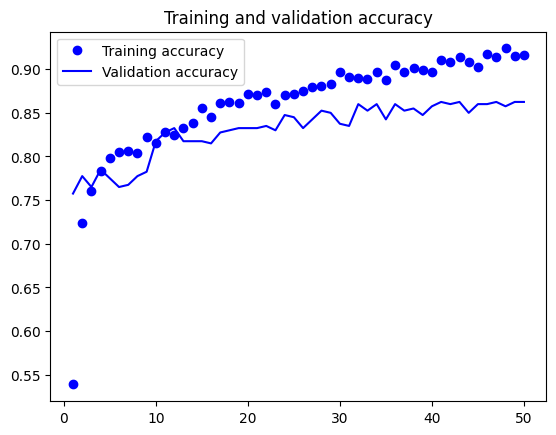

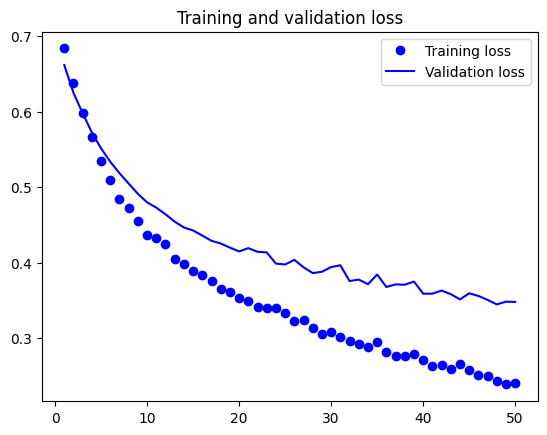

In [15]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [16]:
test_model_2 = keras.models.load_model(base_dir /  "VGG16.keras")
test_loss, test_acc = test_model_2.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

19/19 [==============================] - 311s 17s/step - loss: 0.4153 - accuracy: 0.8250
Test accuracy: 0.825


### Create file label.txt and convert file model to tflite

In [17]:
import os #for file management
from google.colab import files


In [18]:
print(train_dataset.class_indices)
labels = '\n'.join(sorted(train_dataset.class_indices.keys()))
with open('labels.txt', 'w') as f:
    f.write(labels)

{'benign': 0, 'malignent': 1}


In [23]:
model = tf.keras.models.load_model(base_dir/"VGG16.keras")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflmodel = converter.convert()
file = open( 'model.tflite' , 'wb' )
file.write( tflmodel )

59459532

In [24]:
files.download('model.tflite')
files.download('labels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>